In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import seaborn as sns

In [36]:
# create the dataset
X,y = make_moons(n_samples=350, noise=0.05, random_state=42)

<Axes: >

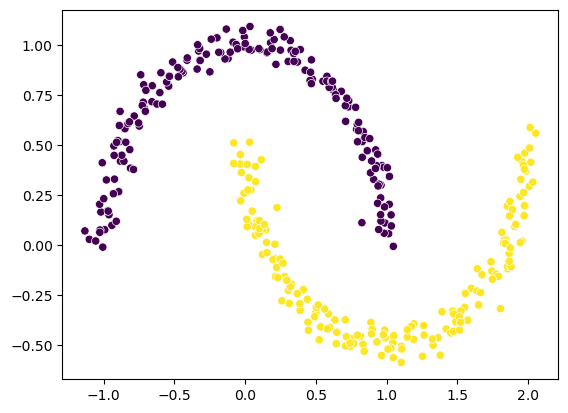

In [37]:
# Visualize the datapoints

sns.scatterplot(x=X[:,0], y=X[:,1], c=y)

In [38]:
# scale the data

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)


In [39]:
# apply DBSCAN

dbscan = DBSCAN(eps= 0.3, min_samples=10)
dbscan.fit(X_scaled)

DBSCAN(eps=0.3, min_samples=10)

In [40]:
# print labels

dbscan.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,

<Axes: >

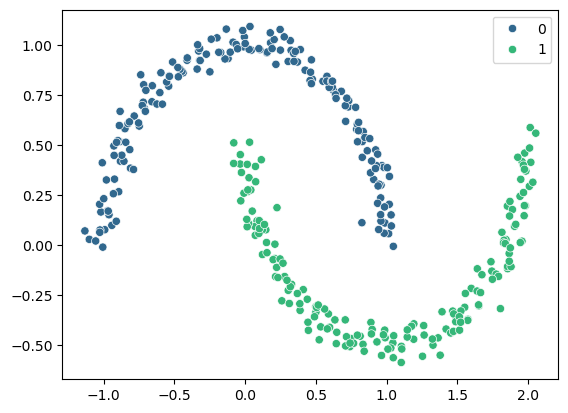

In [41]:
# show the scatter plot representing the clusters

sns.scatterplot(x=X[:,0] , y=X[:,1] , hue=dbscan.labels_, palette='viridis')

## lets try with increase the density in the dataset

In [8]:
X, y = make_moons(n_samples= 350, noise=0.15, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
dbscan = DBSCAN(eps= 0.3, min_samples=10)
dbscan.fit(X_scaled)

DBSCAN(eps=0.3, min_samples=10)

<Axes: >

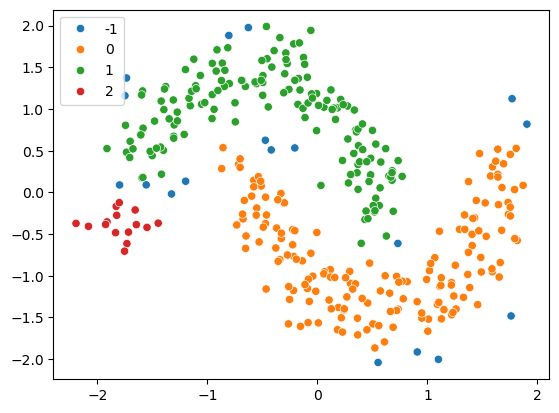

In [11]:
sns.scatterplot(x= X_scaled[:,0] , y = X_scaled[:,1], hue=dbscan.labels_, palette='tab10')

### Note: 
Effect of Increasing Noise on DBSCAN:
When the `noise` parameter in `make_moons` increases, DBSCAN’s clustering quality deteriorates because it relies on **dense, well-separated regions** to form clusters.

**Key Observations:**
- Higher noise causes inconsistent densities — some areas become sparse while others stay dense.  
- Points appear in the gap between clusters, making DBSCAN merge or fragment them incorrectly.  
- Since DBSCAN uses a **fixed `eps`**, it cannot adapt to varying densities caused by noise.

**Conclusion:**  
Increasing noise highlights one of DBSCAN’s main limitations — it struggles with **non-uniform or overlapping densities**, leading to distorted or unstable clusters.

## Evaluating DBSCAN with Silhouette Score in Clustering

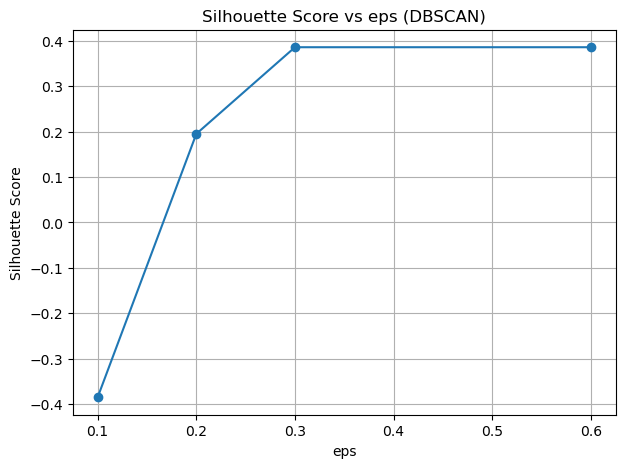

In [51]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#  Try a range of eps values
eps_values = [0.1, 0.2, 0.3, 0.6]
scores = []

for ep in eps_values:
    dbscan = DBSCAN(eps=ep, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, labels, metric="euclidean")
    scores.append(s)
# Step 3: Plot Silhouette Scores
plt.figure(figsize=(7,5))
plt.plot(eps_values, scores, marker='o')
plt.title("Silhouette Score vs eps (DBSCAN)")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### NOTE:
- Silhouette ranges from **-1 to +1**:
  - **+1 →** perfect, compact, well-separated clusters  
  - **0 →** overlapping clusters  
  - **-1 →** wrong clustering
  
- For DBSCAN on non-convex data (e.g., `make_moons`), scores around **0.3–0.5** already indicate good separation.  
- A lower score doesn’t always mean bad clustering — DBSCAN may still find meaningful shapes that Silhouette (a convex metric) doesn’t fully capture.

**Conclusion:**  
Yes, higher is better — but for curved or noisy data, even **~0.4** is a strong result. Aim for the **highest score within your dataset’s natural structure**, not necessarily 1.0.


## Evaluating DBSCAN with Rand Index (RI)

In [54]:
# Evaluate clustering performance using ARI
from sklearn.metrics import rand_score

ri = rand_score(y, labels)
print("Rand Index (RI):", round(ri, 3))

Rand Index (RI): 1.0


##  Final Takeaways

- **Silhouette Score** → *Internal validation* (no labels).  
- **Rand Index (RI)** → *External validation* (with labels).  
- Use **Silhouette Score** to **tune `eps`**.  
- Use **RI** to **verify how close your clusters are to the ground truth**.  

> 🧩 **DBSCAN** is a powerful, noise-tolerant clustering algorithm that excels when cluster shapes are non-linear and the number of clusters is unknown.